# SUPPORT VECTOR REGRESSION (SVR)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import warnings

# Data Preparation

In [2]:
# For ignoring warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the data
salary = pd.read_csv("Position_Salaries.csv")
print(salary)
# No need to split the data into training and test sets because we have few observations
# No need to use Position column
# Splitting X's and y's
x = salary.iloc[:,1:-1].values
y = salary.iloc[:,-1].values
print(x)
print(y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Feature Scaling

In [4]:
# Feature scaling is prior to SVM model training -
# Now we have 1 feature but still Salary is higher than the level values

# StandardScaler expect unique format
# So we need to reshape the y into 2D array just like x.
y = y.reshape(len(y),1) #(10x1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [5]:
# Scaling
scaler_x = StandardScaler()
# scaling x
x = scaler_x.fit_transform(x)
# we need to create new scaler object for y (different std dev and mean)
# scaling y
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
print("x\n",x)
print("y\n",y)

x
 [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
y
 [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training SVR Model

In [6]:
svr = SVR(kernel = "rbf")
svr.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

# Predicting a New Result

In [7]:
# First need to apply inverse transform to go back to original scale
scaler_y.inverse_transform(svr.predict(scaler_x.transform([[6.5]])))

array([170370.0204065])

# Visualizing SVR Results

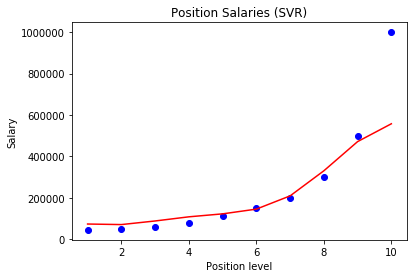

In [8]:
plt.scatter(scaler_x.inverse_transform(x),scaler_y.inverse_transform(y), color = "blue")
plt.plot(scaler_x.inverse_transform(x), scaler_y.inverse_transform(svr.predict(x)), color = "red")
plt.title('Position Salaries (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualizing SVR Results (for higher resolution and smoother curve)

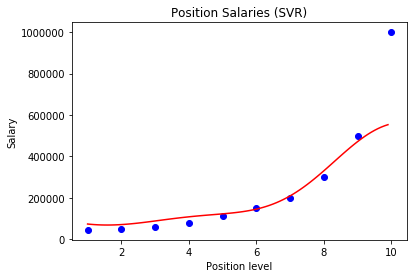

In [9]:
X_grid = np.arange(min(scaler_x.inverse_transform(x)), max(scaler_x.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scaler_x.inverse_transform(x), scaler_y.inverse_transform(y), color = 'blue')
plt.plot(X_grid, scaler_y.inverse_transform(svr.predict(scaler_x.transform(X_grid))), color = 'red')
plt.title('Position Salaries (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()